In [1]:
import scipy.io as sio
import numpy as np
from sklearn import preprocessing
import DataLoader as dl
import math

# Binarization preprocessing
def binarization(a):
	binarizer = preprocessing.Binarizer().fit(a)
	return binarizer.transform(a)

# Compute Maximum Likelihood Estimation of lambda
def getLambdaML(data):
	a = np.array(data)
	unique, counts = np.unique(a, return_counts=True)
	labels = dict(zip(unique, counts))
	# ML Estimate of lambda = N1/N
	lambdaMl = labels[1]/(labels[0]+labels[1])
	return lambdaMl, labels[0], labels[1]+labels[0]

def getNbClassifier(xtrain, ytrain):
	# lambdaMl = getLambdaML(ytrain)
	# Separate xtrain by class/label
	spam = []
	nonspam = []
	for i in range(len(xtrain)):
		vector = xtrain[i]
		if ytrain[i] == 0:
			nonspam.append(vector)
		else:
			spam.append(vector)
	spam = np.array(spam).astype(int)
	nonspam = np.array(nonspam).astype(int)
	# calculate Xcj matrix
	numFeatures = spam.shape[1]
	print('Feauture Number: ', numFeatures)
	x = np.zeros((2, numFeatures)).astype(int)
	x[1] = np.sum(spam, axis=0)
	x[0] = np.sum(nonspam, axis=0)
	print(x[0])
	print(x[1])
	return x

def getPredictions(classifier, xtest):
	return

In [2]:
# Load data from spamData.mat
xtrain, ytrain, xtest, ytest = dl.loadData('spamData.mat')
xtrain = binarization(xtrain)
xtest = binarization(xtest)

In [3]:
# Get classifier
naiveBayesClassifier = getNbClassifier(xtrain, ytrain)

Feauture Number:  57
[ 260  176  497    6  394  218   29  140  135  319   96  776  203   82
   33  172  168  227 1037   29  617    9   52   35  672  508  499  274
  227  280  176  127  229  128  267  309  471   34  210  155   94  204
  182  166  526  287   26  122  337 1000  249  479  184  146 1825 1825
 1825]
[ 431  433  760   25  783  457  523  444  394  582  391  785  357  151
  202  692  489  476 1102  274 1006   57  416  461   38   18    7   19
    8    9    3    2   48    7   37   81   72   23   51  144    1   12
   58   28  321   54   12   11  191  801   88 1033  761  358 1240 1240
 1240]


In [4]:
# Get Maximum Likelihood Estimation of lambda
lambdaMl, N1, N = getLambdaML(ytrain)

In [5]:
# Create an array of alpha values, from 0 to 100 with step size 0.5
alphaStart = 0
alphaEnd = 100
alphaStepSize = 0.5
alphaArr = np.arange(alphaStart, alphaEnd + alphaStepSize, alphaStepSize)

In [14]:
# Initialise an array of error rate
errRate = np.zeros(alphaArr.shape[0])

In [15]:
def calcPosteriorProdictiveDist(alpha, naiveBayesClassifier, lambdaMl, featureVector):
	# Initialise
	lambdaMlArr = np.array([1 - lambdaMl, lambdaMl])
	logP_yTilde = np.log(lambdaMlArr)
	#print('lambdaMlArr ',logP_yTilde)
    
	#print('featureVector ', featureVector)
	#print('p(y=0):')

	# Calculate  logP(yTilde = 0 | xTilde, D)
	for i in range(featureVector.shape[0]):
		feature = featureVector[i]
		if (feature):
			n1 = naiveBayesClassifier[0][i]
		else:
			n1 = N1 - naiveBayesClassifier[0][i]
		prior = (n1 + alpha)/(N1 + 2* alpha)
		#print('n1: ', n1, 'N: ', N1)
		#print('prior: ', prior)
		if prior == 0:
			prior = 0.00000001;
		#print('logP_yTilde', logP_yTilde[0])
		logP_yTilde[0] += math.log(prior)
        
	#print('p(y=1):')
	# Calculate  logP(yTilde = 1 | xTilde, D)
	for i in range(featureVector.shape[0]):
		feature = featureVector[i]
		if (feature):
			n1 = naiveBayesClassifier[1][i]
		else:
			n1 = N - N1 - naiveBayesClassifier[1][i]
		#print('n1: ', n1, 'N: ', N - N1)
		prior = (n1 + alpha)/((N - N1) + 2* alpha)
		#print('prior: ', prior)
		if prior == 0:
			prior = 0.00000001;
		logP_yTilde[1] += math.log(prior)
	#print('logP_yTilde_0',logP_yTilde[0])
	#print('logP_yTilde_1',logP_yTilde[1])
	if logP_yTilde[0] > logP_yTilde[1]:
		return 0
	else:
		return 1
    

In [16]:
for j in range(alphaArr.shape[0]):
	alpha = alphaArr[j]
	print('alpha: ', alpha)
	predictedRes = np.zeros(xtest.shape[0])
	for i in range(xtest.shape[0]):
		featureVector = xtest[i]
		predictedRes[i] = calcPosteriorProdictiveDist(alpha, naiveBayesClassifier, lambdaMl, featureVector)
		#print('predicted: ', predictedRes[i])
	predictedRes = predictedRes.astype(int)
	ytest = ytest.flatten().astype(int)
	errRate[j] = np.mean( predictedRes != ytest )
	print(errRate[j])

alpha:  0.0
0.12044270833333333
alpha:  0.5
0.12174479166666667
alpha:  1.0
0.12369791666666667
alpha:  1.5
0.12434895833333333
alpha:  2.0
0.125
alpha:  2.5
0.12565104166666666
alpha:  3.0
0.12565104166666666
alpha:  3.5
0.126953125
alpha:  4.0
0.12630208333333334
alpha:  4.5
0.12630208333333334
alpha:  5.0
0.126953125
alpha:  5.5
0.12565104166666666
alpha:  6.0
0.12565104166666666
alpha:  6.5
0.12565104166666666
alpha:  7.0
0.12565104166666666
alpha:  7.5
0.12565104166666666
alpha:  8.0
0.12565104166666666
alpha:  8.5
0.12565104166666666
alpha:  9.0
0.126953125
alpha:  9.5
0.126953125
alpha:  10.0
0.126953125
alpha:  10.5
0.12760416666666666
alpha:  11.0
0.12760416666666666
alpha:  11.5
0.12760416666666666
alpha:  12.0
0.12760416666666666
alpha:  12.5
0.12760416666666666
alpha:  13.0
0.12825520833333334
alpha:  13.5
0.12825520833333334
alpha:  14.0
0.12825520833333334
alpha:  14.5
0.12825520833333334
alpha:  15.0
0.12825520833333334
alpha:  15.5
0.12825520833333334
alpha:  16.0
0.128

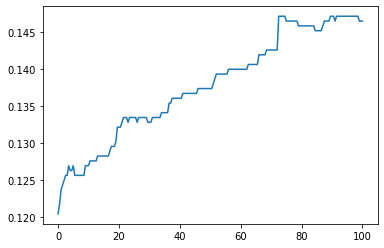

In [19]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(alphaArr, errRate)
plt.show()